In [1]:
import matplotlib.pyplot as plt
from train_stochastic_encoder import *
import numpy as np
import jax.numpy as jnp
import jax

2022-12-18 16:15:16.832412: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-18 16:15:17.371475: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.7/lib64:/home/katie/.mujoco/mujoco210/bin:/home/katie/.mujoco/mjpro150/bin:/usr/lib/nvidia
2022-12-18 16:15:17.371545: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.7/lib64:/home/katie/.mujoco/mujoco210/bin:/home/katie/.mujoco/mjpro150/bin:/usr/lib/nvidia
2022-12-18 16:15:17.371552: W tensorflow/compiler/tf2tensorrt/utils/py_utils

In [2]:
# ! CUDA_VISIBLE_DEVICES=1
rotations = np.array([0, 15, 30, 45, 60, 75]).astype(int)
train_ds, test_ds = get_datasets(rotations)
rng = jax.random.PRNGKey(0)
# noise_probs = [0.1*_ for _ in range(11)]
# kl_coeffs = [0, 0.0005, 0.001, 0.002, 0.0025, 0.0035, 0.005, 0.006, 0.0075, 0.009, 0.01, 0.02, 0.04, 0.08, 0.16]
# kl_coeffs = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
kl_coeffs = [0.05*_ for _ in range(10)]
policy_avg_return_all = []
robust_policy_avg_return_all = []
q_std_all = []
for kl_coeff in kl_coeffs:
    state2 = train(train_ds, test_ds, rotations, kl_coeff)
    policy_avg_return_per_kl_coeff = []
    robust_policy_avg_return_per_kl_coeff = []
    q_std_per_kl_coeff = []
    for rotation in rotations:
        rng, input_rng = jax.random.split(rng)
        test_loss, policy_avg_return, robust_policy_avg_return, q_std = evaluate_model(input_rng, state2, test_ds['image'+str(rotation)], test_ds['label'])
        policy_avg_return_per_kl_coeff.append(float(policy_avg_return))
        robust_policy_avg_return_per_kl_coeff.append(float(robust_policy_avg_return))
        q_std_per_kl_coeff.append(float(q_std))
    policy_avg_return_all.append(policy_avg_return_per_kl_coeff)
    robust_policy_avg_return_all.append(robust_policy_avg_return_per_kl_coeff)
    q_std_all.append(q_std_per_kl_coeff)
    
    
    
    

100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:03<00:00, 129.94it/s]


train epoch: 1, loss: 0.4774
0 loss : 0.2040, return: 0.4329, robust return 0.4250, q std: 0.0588
15 loss : 0.2995, return: 0.3862, robust return 0.3851, q std: 0.0588
30 loss : 0.4768, return: 0.3184, robust return 0.3312, q std: 0.0510
45 loss : 0.6795, return: 0.2587, robust return 0.2815, q std: 0.0436
60 loss : 0.8133, return: 0.2263, robust return 0.2547, q std: 0.0383
75 loss : 0.8457, return: 0.2050, robust return 0.2408, q std: 0.0358


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 427.47it/s]


train epoch: 2, loss: 0.1509
0 loss : 0.1167, return: 0.5665, robust return 0.5632, q std: 0.0176
15 loss : 0.1910, return: 0.5061, robust return 0.5044, q std: 0.0189
30 loss : 0.3788, return: 0.3215, robust return 0.3297, q std: 0.0178
45 loss : 0.6233, return: 0.0847, robust return 0.1067, q std: 0.0162
60 loss : 0.7985, return: -0.0448, robust return -0.0249, q std: 0.0141
75 loss : 0.8561, return: -0.0600, robust return -0.0404, q std: 0.0128


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 424.35it/s]


train epoch: 3, loss: 0.1020
0 loss : 0.0888, return: 0.6105, robust return 0.6084, q std: 0.0094
15 loss : 0.1492, return: 0.5497, robust return 0.5460, q std: 0.0100
30 loss : 0.3315, return: 0.3469, robust return 0.3505, q std: 0.0094
45 loss : 0.5865, return: 0.0856, robust return 0.0950, q std: 0.0085
60 loss : 0.7735, return: -0.0730, robust return -0.0586, q std: 0.0075
75 loss : 0.8372, return: -0.1102, robust return -0.0947, q std: 0.0070


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 429.66it/s]


train epoch: 4, loss: 0.0805
0 loss : 0.0732, return: 0.6406, robust return 0.6390, q std: 0.0067
15 loss : 0.1210, return: 0.5822, robust return 0.5804, q std: 0.0071
30 loss : 0.3004, return: 0.3663, robust return 0.3710, q std: 0.0067
45 loss : 0.5506, return: 0.0364, robust return 0.0611, q std: 0.0063
60 loss : 0.7389, return: -0.1887, robust return -0.1684, q std: 0.0058
75 loss : 0.8041, return: -0.2461, robust return -0.2303, q std: 0.0055


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 426.23it/s]


train epoch: 5, loss: 0.0678
0 loss : 0.0658, return: 0.6799, robust return 0.6782, q std: 0.0049
15 loss : 0.1091, return: 0.6062, robust return 0.6051, q std: 0.0053
30 loss : 0.2848, return: 0.2799, robust return 0.2852, q std: 0.0051
45 loss : 0.5624, return: -0.2217, robust return -0.2039, q std: 0.0048
60 loss : 0.7728, return: -0.4856, robust return -0.4719, q std: 0.0045
75 loss : 0.8468, return: -0.5053, robust return -0.4879, q std: 0.0043


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 428.66it/s]


train epoch: 6, loss: 0.0582
0 loss : 0.0581, return: 0.7051, robust return 0.7055, q std: 0.0042
15 loss : 0.0968, return: 0.6422, robust return 0.6437, q std: 0.0043
30 loss : 0.2638, return: 0.3261, robust return 0.3320, q std: 0.0041
45 loss : 0.5359, return: -0.1974, robust return -0.1820, q std: 0.0037
60 loss : 0.7378, return: -0.5385, robust return -0.5224, q std: 0.0035
75 loss : 0.8138, return: -0.5522, robust return -0.5344, q std: 0.0034


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 435.20it/s]


train epoch: 7, loss: 0.0514
0 loss : 0.0514, return: 0.7267, robust return 0.7278, q std: 0.0036
15 loss : 0.0893, return: 0.6603, robust return 0.6619, q std: 0.0038
30 loss : 0.2507, return: 0.3303, robust return 0.3335, q std: 0.0037
45 loss : 0.5347, return: -0.2418, robust return -0.2254, q std: 0.0035
60 loss : 0.7509, return: -0.6688, robust return -0.6397, q std: 0.0033
75 loss : 0.8351, return: -0.7350, robust return -0.7017, q std: 0.0032


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 425.79it/s]


train epoch: 8, loss: 0.0454
0 loss : 0.0500, return: 0.7251, robust return 0.7257, q std: 0.0031
15 loss : 0.0921, return: 0.6438, robust return 0.6451, q std: 0.0032
30 loss : 0.2562, return: 0.2717, robust return 0.2774, q std: 0.0031
45 loss : 0.5258, return: -0.3487, robust return -0.3337, q std: 0.0030
60 loss : 0.7339, return: -0.7693, robust return -0.7454, q std: 0.0028
75 loss : 0.8239, return: -0.8912, robust return -0.8590, q std: 0.0027


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 431.68it/s]


train epoch: 9, loss: 0.0407
0 loss : 0.0476, return: 0.7464, robust return 0.7463, q std: 0.0024
15 loss : 0.0833, return: 0.6861, robust return 0.6879, q std: 0.0026
30 loss : 0.2311, return: 0.3632, robust return 0.3678, q std: 0.0025
45 loss : 0.5051, return: -0.2899, robust return -0.2779, q std: 0.0024
60 loss : 0.7338, return: -0.7775, robust return -0.7568, q std: 0.0023
75 loss : 0.8328, return: -0.9299, robust return -0.9060, q std: 0.0022


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 427.43it/s]


train epoch: 10, loss: 0.0375
0 loss : 0.0444, return: 0.7494, robust return 0.7502, q std: 0.0022
15 loss : 0.0763, return: 0.6884, robust return 0.6885, q std: 0.0022
30 loss : 0.2350, return: 0.3682, robust return 0.3691, q std: 0.0021
45 loss : 0.5240, return: -0.2792, robust return -0.2709, q std: 0.0019
60 loss : 0.7483, return: -0.7675, robust return -0.7533, q std: 0.0017
75 loss : 0.8295, return: -0.8920, robust return -0.8751, q std: 0.0016


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:02<00:00, 219.88it/s]


train epoch: 1, loss: 0.6206
0 loss : 0.1935, return: 0.3750, robust return 0.3787, q std: 0.7488
15 loss : 0.2461, return: 0.3606, robust return 0.3679, q std: 0.7599
30 loss : 0.4008, return: 0.3379, robust return 0.3442, q std: 0.7749
45 loss : 0.6163, return: 0.2975, robust return 0.3075, q std: 0.7834
60 loss : 0.7746, return: 0.2759, robust return 0.2794, q std: 0.7844
75 loss : 0.8384, return: 0.2680, robust return 0.2696, q std: 0.7824


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 412.16it/s]


train epoch: 2, loss: 0.2927
0 loss : 0.1140, return: 0.4746, robust return 0.4249, q std: 0.7651
15 loss : 0.1584, return: 0.4482, robust return 0.4045, q std: 0.7684
30 loss : 0.3005, return: 0.3683, robust return 0.3715, q std: 0.7742
45 loss : 0.5167, return: 0.2260, robust return 0.3314, q std: 0.7792
60 loss : 0.7127, return: 0.1128, robust return 0.2957, q std: 0.7794
75 loss : 0.8011, return: 0.0543, robust return 0.2796, q std: 0.7805


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 412.04it/s]


train epoch: 3, loss: 0.2583
0 loss : 0.0918, return: 0.5560, robust return 0.4678, q std: 0.7588
15 loss : 0.1331, return: 0.5154, robust return 0.4439, q std: 0.7604
30 loss : 0.2826, return: 0.3620, robust return 0.3833, q std: 0.7633
45 loss : 0.5040, return: 0.1221, robust return 0.3167, q std: 0.7654
60 loss : 0.6967, return: -0.0616, robust return 0.2670, q std: 0.7650
75 loss : 0.7737, return: -0.1155, robust return 0.2540, q std: 0.7643


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 423.55it/s]


train epoch: 4, loss: 0.2447
0 loss : 0.0793, return: 0.5650, robust return 0.4940, q std: 0.7629
15 loss : 0.1161, return: 0.5275, robust return 0.4669, q std: 0.7638
30 loss : 0.2618, return: 0.3648, robust return 0.3942, q std: 0.7657
45 loss : 0.4815, return: 0.1113, robust return 0.3089, q std: 0.7674
60 loss : 0.6849, return: -0.1029, robust return 0.2400, q std: 0.7672
75 loss : 0.7650, return: -0.1734, robust return 0.2278, q std: 0.7670


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 417.67it/s]


train epoch: 5, loss: 0.2360
0 loss : 0.0694, return: 0.5898, robust return 0.5471, q std: 0.7657
15 loss : 0.1025, return: 0.5517, robust return 0.5217, q std: 0.7664
30 loss : 0.2445, return: 0.3907, robust return 0.4371, q std: 0.7676
45 loss : 0.4858, return: 0.1079, robust return 0.3075, q std: 0.7663
60 loss : 0.7253, return: -0.1765, robust return 0.1933, q std: 0.7640
75 loss : 0.8279, return: -0.2937, robust return 0.1407, q std: 0.7636


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 413.49it/s]


train epoch: 6, loss: 0.2297
0 loss : 0.0697, return: 0.5998, robust return 0.5334, q std: 0.7627
15 loss : 0.1080, return: 0.5460, robust return 0.5048, q std: 0.7643
30 loss : 0.2650, return: 0.3125, robust return 0.4201, q std: 0.7638
45 loss : 0.5055, return: -0.0537, robust return 0.3125, q std: 0.7614
60 loss : 0.7151, return: -0.3430, robust return 0.2207, q std: 0.7608
75 loss : 0.7981, return: -0.4164, robust return 0.1879, q std: 0.7608


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 425.03it/s]


train epoch: 7, loss: 0.2254
0 loss : 0.0674, return: 0.6015, robust return 0.5588, q std: 0.7585
15 loss : 0.1045, return: 0.5442, robust return 0.5287, q std: 0.7606
30 loss : 0.2507, return: 0.3149, robust return 0.4394, q std: 0.7625
45 loss : 0.4717, return: -0.0666, robust return 0.3239, q std: 0.7621
60 loss : 0.6837, return: -0.4301, robust return 0.2339, q std: 0.7602
75 loss : 0.7990, return: -0.5810, robust return 0.1828, q std: 0.7612


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 416.26it/s]


train epoch: 8, loss: 0.2212
0 loss : 0.0576, return: 0.6276, robust return 0.5794, q std: 0.7601
15 loss : 0.0923, return: 0.5758, robust return 0.5493, q std: 0.7594
30 loss : 0.2481, return: 0.3215, robust return 0.4331, q std: 0.7597
45 loss : 0.4720, return: -0.0860, robust return 0.2710, q std: 0.7589
60 loss : 0.6861, return: -0.4452, robust return 0.1317, q std: 0.7561
75 loss : 0.7969, return: -0.5543, robust return 0.0759, q std: 0.7543


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 417.75it/s]


train epoch: 9, loss: 0.2176
0 loss : 0.0625, return: 0.6397, robust return 0.5802, q std: 0.7634
15 loss : 0.0956, return: 0.5825, robust return 0.5549, q std: 0.7636
30 loss : 0.2414, return: 0.2927, robust return 0.4518, q std: 0.7640
45 loss : 0.4733, return: -0.1895, robust return 0.3045, q std: 0.7626
60 loss : 0.7021, return: -0.6300, robust return 0.1673, q std: 0.7616
75 loss : 0.8135, return: -0.7355, robust return 0.1155, q std: 0.7617


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 410.98it/s]


train epoch: 10, loss: 0.2145
0 loss : 0.0593, return: 0.6414, robust return 0.5689, q std: 0.7576
15 loss : 0.0872, return: 0.5949, robust return 0.5475, q std: 0.7584
30 loss : 0.2206, return: 0.3491, robust return 0.4565, q std: 0.7582
45 loss : 0.4708, return: -0.1741, robust return 0.3048, q std: 0.7567
60 loss : 0.7110, return: -0.6274, robust return 0.1831, q std: 0.7543
75 loss : 0.7983, return: -0.7442, robust return 0.1358, q std: 0.7521


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:02<00:00, 219.45it/s]


train epoch: 1, loss: 0.6520
0 loss : 0.1922, return: 0.4028, robust return 0.3821, q std: 0.7889
15 loss : 0.2434, return: 0.3868, robust return 0.3719, q std: 0.7954
30 loss : 0.3945, return: 0.3566, robust return 0.3451, q std: 0.8033
45 loss : 0.6158, return: 0.3120, robust return 0.3077, q std: 0.8076
60 loss : 0.7933, return: 0.2794, robust return 0.2770, q std: 0.8075
75 loss : 0.8653, return: 0.2655, robust return 0.2654, q std: 0.8073


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 413.45it/s]


train epoch: 2, loss: 0.3980
0 loss : 0.1315, return: 0.4547, robust return 0.3877, q std: 0.7850
15 loss : 0.1837, return: 0.4319, robust return 0.3784, q std: 0.7898
30 loss : 0.3388, return: 0.3767, robust return 0.3530, q std: 0.7974
45 loss : 0.5593, return: 0.3007, robust return 0.3173, q std: 0.8042
60 loss : 0.7579, return: 0.2392, robust return 0.2848, q std: 0.8050
75 loss : 0.8353, return: 0.2200, robust return 0.2725, q std: 0.8059


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 417.65it/s]


train epoch: 3, loss: 0.3723
0 loss : 0.1229, return: 0.5119, robust return 0.3985, q std: 0.7818
15 loss : 0.1614, return: 0.4776, robust return 0.3880, q std: 0.7845
30 loss : 0.2987, return: 0.3596, robust return 0.3639, q std: 0.7900
45 loss : 0.5143, return: 0.1749, robust return 0.3267, q std: 0.7951
60 loss : 0.7195, return: 0.0110, robust return 0.2927, q std: 0.7958
75 loss : 0.8113, return: -0.0452, robust return 0.2775, q std: 0.7958


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 407.41it/s]


train epoch: 4, loss: 0.3600
0 loss : 0.0969, return: 0.5309, robust return 0.4089, q std: 0.7796
15 loss : 0.1317, return: 0.5076, robust return 0.3987, q std: 0.7817
30 loss : 0.2850, return: 0.3795, robust return 0.3727, q std: 0.7856
45 loss : 0.5121, return: 0.1681, robust return 0.3332, q std: 0.7898
60 loss : 0.6996, return: -0.0024, robust return 0.2993, q std: 0.7910
75 loss : 0.7775, return: -0.0491, robust return 0.2842, q std: 0.7907


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 390.00it/s]


train epoch: 5, loss: 0.3536
0 loss : 0.0914, return: 0.5598, robust return 0.3978, q std: 0.7813
15 loss : 0.1237, return: 0.5246, robust return 0.3916, q std: 0.7830
30 loss : 0.2624, return: 0.3881, robust return 0.3691, q std: 0.7871
45 loss : 0.5005, return: 0.1447, robust return 0.3301, q std: 0.7895
60 loss : 0.7330, return: -0.0886, robust return 0.2911, q std: 0.7906
75 loss : 0.8403, return: -0.1758, robust return 0.2726, q std: 0.7913


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 412.47it/s]


train epoch: 6, loss: 0.3477
0 loss : 0.0983, return: 0.5660, robust return 0.4095, q std: 0.7822
15 loss : 0.1311, return: 0.5233, robust return 0.3966, q std: 0.7837
30 loss : 0.2710, return: 0.3588, robust return 0.3698, q std: 0.7869
45 loss : 0.4883, return: 0.1005, robust return 0.3314, q std: 0.7898
60 loss : 0.6969, return: -0.1374, robust return 0.2941, q std: 0.7922
75 loss : 0.7994, return: -0.2420, robust return 0.2768, q std: 0.7928


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 396.15it/s]


train epoch: 7, loss: 0.3444
0 loss : 0.0796, return: 0.5742, robust return 0.4205, q std: 0.7790
15 loss : 0.1124, return: 0.5384, robust return 0.4111, q std: 0.7803
30 loss : 0.2421, return: 0.4002, robust return 0.3872, q std: 0.7840
45 loss : 0.4646, return: 0.1569, robust return 0.3434, q std: 0.7856
60 loss : 0.7054, return: -0.1127, robust return 0.2932, q std: 0.7850
75 loss : 0.8445, return: -0.2530, robust return 0.2684, q std: 0.7855


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 424.47it/s]


train epoch: 8, loss: 0.3400
0 loss : 0.0754, return: 0.5797, robust return 0.4169, q std: 0.7795
15 loss : 0.1082, return: 0.5467, robust return 0.4052, q std: 0.7799
30 loss : 0.2437, return: 0.4030, robust return 0.3787, q std: 0.7836
45 loss : 0.4715, return: 0.1629, robust return 0.3380, q std: 0.7871
60 loss : 0.6950, return: -0.0559, robust return 0.2982, q std: 0.7884
75 loss : 0.8138, return: -0.1594, robust return 0.2773, q std: 0.7884


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 413.38it/s]


train epoch: 9, loss: 0.3369
0 loss : 0.0794, return: 0.5945, robust return 0.4125, q std: 0.7836
15 loss : 0.1084, return: 0.5587, robust return 0.4012, q std: 0.7849
30 loss : 0.2448, return: 0.3965, robust return 0.3732, q std: 0.7902
45 loss : 0.4710, return: 0.1359, robust return 0.3334, q std: 0.7945
60 loss : 0.7137, return: -0.1367, robust return 0.2927, q std: 0.7974
75 loss : 0.8481, return: -0.2795, robust return 0.2703, q std: 0.7982


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 402.25it/s]


train epoch: 10, loss: 0.3333
0 loss : 0.0853, return: 0.6016, robust return 0.4420, q std: 0.7812
15 loss : 0.1143, return: 0.5665, robust return 0.4237, q std: 0.7820
30 loss : 0.2495, return: 0.3878, robust return 0.3843, q std: 0.7854
45 loss : 0.4833, return: 0.0496, robust return 0.3352, q std: 0.7878
60 loss : 0.7482, return: -0.3186, robust return 0.2868, q std: 0.7882
75 loss : 0.8896, return: -0.5178, robust return 0.2628, q std: 0.7878


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:02<00:00, 213.54it/s]


train epoch: 1, loss: 0.6979
0 loss : 0.2228, return: 0.3698, robust return 0.3748, q std: 0.8136
15 loss : 0.2748, return: 0.3576, robust return 0.3646, q std: 0.8224
30 loss : 0.4244, return: 0.3337, robust return 0.3389, q std: 0.8317
45 loss : 0.6363, return: 0.2984, robust return 0.3028, q std: 0.8366
60 loss : 0.7869, return: 0.2725, robust return 0.2777, q std: 0.8372
75 loss : 0.8371, return: 0.2663, robust return 0.2694, q std: 0.8354


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 399.65it/s]


train epoch: 2, loss: 0.4809
0 loss : 0.1465, return: 0.4345, robust return 0.3831, q std: 0.8006
15 loss : 0.1873, return: 0.4197, robust return 0.3761, q std: 0.8065
30 loss : 0.3370, return: 0.3685, robust return 0.3517, q std: 0.8141
45 loss : 0.5838, return: 0.2924, robust return 0.3119, q std: 0.8211
60 loss : 0.7752, return: 0.2200, robust return 0.2820, q std: 0.8220
75 loss : 0.8392, return: 0.2021, robust return 0.2722, q std: 0.8229


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 420.05it/s]


train epoch: 3, loss: 0.4587
0 loss : 0.1321, return: 0.4604, robust return 0.3856, q std: 0.8016
15 loss : 0.1750, return: 0.4450, robust return 0.3783, q std: 0.8058
30 loss : 0.3207, return: 0.3792, robust return 0.3553, q std: 0.8108
45 loss : 0.5546, return: 0.2791, robust return 0.3184, q std: 0.8148
60 loss : 0.7536, return: 0.1802, robust return 0.2860, q std: 0.8150
75 loss : 0.8200, return: 0.1632, robust return 0.2755, q std: 0.8135


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 424.24it/s]


train epoch: 4, loss: 0.4476
0 loss : 0.1142, return: 0.4509, robust return 0.3902, q std: 0.7989
15 loss : 0.1520, return: 0.4339, robust return 0.3829, q std: 0.8020
30 loss : 0.3061, return: 0.3678, robust return 0.3578, q std: 0.8059
45 loss : 0.5418, return: 0.2349, robust return 0.3212, q std: 0.8086
60 loss : 0.7236, return: 0.1452, robust return 0.2921, q std: 0.8088
75 loss : 0.7943, return: 0.1368, robust return 0.2815, q std: 0.8081


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 414.00it/s]


train epoch: 5, loss: 0.4409
0 loss : 0.1090, return: 0.4672, robust return 0.3893, q std: 0.7984
15 loss : 0.1443, return: 0.4495, robust return 0.3827, q std: 0.8014
30 loss : 0.2922, return: 0.3991, robust return 0.3589, q std: 0.8051
45 loss : 0.5532, return: 0.3074, robust return 0.3173, q std: 0.8051
60 loss : 0.7604, return: 0.2259, robust return 0.2844, q std: 0.8033
75 loss : 0.8301, return: 0.2143, robust return 0.2739, q std: 0.8020


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 412.88it/s]


train epoch: 6, loss: 0.4359
0 loss : 0.1041, return: 0.4924, robust return 0.3904, q std: 0.8034
15 loss : 0.1384, return: 0.4674, robust return 0.3833, q std: 0.8076
30 loss : 0.2845, return: 0.3834, robust return 0.3588, q std: 0.8118
45 loss : 0.5169, return: 0.2125, robust return 0.3218, q std: 0.8140
60 loss : 0.7177, return: 0.0630, robust return 0.2909, q std: 0.8154
75 loss : 0.8046, return: 0.0343, robust return 0.2785, q std: 0.8120


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 423.11it/s]


train epoch: 7, loss: 0.4340
0 loss : 0.1011, return: 0.4726, robust return 0.3895, q std: 0.7990
15 loss : 0.1297, return: 0.4649, robust return 0.3844, q std: 0.8023
30 loss : 0.2644, return: 0.4083, robust return 0.3637, q std: 0.8055
45 loss : 0.5014, return: 0.3007, robust return 0.3266, q std: 0.8059
60 loss : 0.7228, return: 0.1968, robust return 0.2919, q std: 0.8040
75 loss : 0.8212, return: 0.1590, robust return 0.2764, q std: 0.8017


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 420.46it/s]


train epoch: 8, loss: 0.4294
0 loss : 0.0909, return: 0.4765, robust return 0.3902, q std: 0.8032
15 loss : 0.1268, return: 0.4626, robust return 0.3850, q std: 0.8043
30 loss : 0.2683, return: 0.4077, robust return 0.3625, q std: 0.8068
45 loss : 0.5028, return: 0.3124, robust return 0.3255, q std: 0.8075
60 loss : 0.7010, return: 0.2047, robust return 0.2938, q std: 0.8050
75 loss : 0.7736, return: 0.1862, robust return 0.2829, q std: 0.8005


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 420.45it/s]


train epoch: 9, loss: 0.4275
0 loss : 0.0939, return: 0.4855, robust return 0.3873, q std: 0.8026
15 loss : 0.1254, return: 0.4681, robust return 0.3815, q std: 0.8048
30 loss : 0.2746, return: 0.3904, robust return 0.3580, q std: 0.8082
45 loss : 0.5232, return: 0.2504, robust return 0.3197, q std: 0.8092
60 loss : 0.7352, return: 0.1235, robust return 0.2870, q std: 0.8095
75 loss : 0.8178, return: 0.0832, robust return 0.2752, q std: 0.8067


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 407.53it/s]


train epoch: 10, loss: 0.4238
0 loss : 0.0974, return: 0.5165, robust return 0.3929, q std: 0.8000
15 loss : 0.1221, return: 0.4906, robust return 0.3875, q std: 0.8017
30 loss : 0.2646, return: 0.3800, robust return 0.3631, q std: 0.8046
45 loss : 0.5239, return: 0.1593, robust return 0.3211, q std: 0.8057
60 loss : 0.7516, return: -0.0292, robust return 0.2850, q std: 0.8043
75 loss : 0.8350, return: -0.0768, robust return 0.2729, q std: 0.8007


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:02<00:00, 211.90it/s]


train epoch: 1, loss: 0.7435
0 loss : 0.2689, return: 0.3563, robust return 0.3654, q std: 0.8309
15 loss : 0.3252, return: 0.3495, robust return 0.3538, q std: 0.8382
30 loss : 0.4647, return: 0.3277, robust return 0.3306, q std: 0.8462
45 loss : 0.6537, return: 0.2960, robust return 0.2995, q std: 0.8493
60 loss : 0.7784, return: 0.2771, robust return 0.2781, q std: 0.8477
75 loss : 0.8088, return: 0.2712, robust return 0.2730, q std: 0.8463


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 402.25it/s]


train epoch: 2, loss: 0.5517
0 loss : 0.1714, return: 0.4095, robust return 0.3756, q std: 0.8242
15 loss : 0.2204, return: 0.3913, robust return 0.3671, q std: 0.8281
30 loss : 0.3712, return: 0.3563, robust return 0.3439, q std: 0.8337
45 loss : 0.5866, return: 0.3137, robust return 0.3100, q std: 0.8383
60 loss : 0.7609, return: 0.2826, robust return 0.2830, q std: 0.8371
75 loss : 0.8345, return: 0.2709, robust return 0.2722, q std: 0.8373


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 415.87it/s]


train epoch: 3, loss: 0.5292
0 loss : 0.1511, return: 0.4227, robust return 0.3793, q std: 0.8198
15 loss : 0.2019, return: 0.4080, robust return 0.3697, q std: 0.8253
30 loss : 0.3528, return: 0.3737, robust return 0.3471, q std: 0.8322
45 loss : 0.5504, return: 0.3296, robust return 0.3164, q std: 0.8364
60 loss : 0.7146, return: 0.2963, robust return 0.2912, q std: 0.8349
75 loss : 0.7953, return: 0.2817, robust return 0.2780, q std: 0.8329


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 393.49it/s]


train epoch: 4, loss: 0.5174
0 loss : 0.1455, return: 0.4216, robust return 0.3767, q std: 0.8205
15 loss : 0.1828, return: 0.4080, robust return 0.3681, q std: 0.8247
30 loss : 0.3232, return: 0.3612, robust return 0.3485, q std: 0.8289
45 loss : 0.5212, return: 0.2996, robust return 0.3210, q std: 0.8313
60 loss : 0.6997, return: 0.2342, robust return 0.2950, q std: 0.8304
75 loss : 0.7926, return: 0.2050, robust return 0.2807, q std: 0.8285


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 421.22it/s]


train epoch: 5, loss: 0.5109
0 loss : 0.1316, return: 0.4273, robust return 0.3788, q std: 0.8184
15 loss : 0.1665, return: 0.4191, robust return 0.3715, q std: 0.8216
30 loss : 0.3094, return: 0.3854, robust return 0.3506, q std: 0.8255
45 loss : 0.5557, return: 0.3320, robust return 0.3147, q std: 0.8257
60 loss : 0.7854, return: 0.2798, robust return 0.2791, q std: 0.8227
75 loss : 0.8796, return: 0.2598, robust return 0.2652, q std: 0.8200


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 422.34it/s]


train epoch: 6, loss: 0.5063
0 loss : 0.1254, return: 0.4173, robust return 0.3794, q std: 0.8205
15 loss : 0.1577, return: 0.4094, robust return 0.3728, q std: 0.8231
30 loss : 0.2955, return: 0.3799, robust return 0.3509, q std: 0.8261
45 loss : 0.5236, return: 0.3314, robust return 0.3180, q std: 0.8267
60 loss : 0.7283, return: 0.2873, robust return 0.2884, q std: 0.8252
75 loss : 0.8360, return: 0.2663, robust return 0.2734, q std: 0.8225


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 420.01it/s]


train epoch: 7, loss: 0.5051
0 loss : 0.1202, return: 0.4473, robust return 0.3790, q std: 0.8155
15 loss : 0.1565, return: 0.4378, robust return 0.3726, q std: 0.8189
30 loss : 0.3070, return: 0.3942, robust return 0.3510, q std: 0.8234
45 loss : 0.5465, return: 0.3159, robust return 0.3157, q std: 0.8248
60 loss : 0.7811, return: 0.2279, robust return 0.2814, q std: 0.8235
75 loss : 0.9078, return: 0.1843, robust return 0.2626, q std: 0.8226


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 419.36it/s]


train epoch: 8, loss: 0.5000
0 loss : 0.1059, return: 0.4367, robust return 0.3829, q std: 0.8197
15 loss : 0.1505, return: 0.4300, robust return 0.3741, q std: 0.8217
30 loss : 0.2928, return: 0.3963, robust return 0.3530, q std: 0.8258
45 loss : 0.5108, return: 0.3383, robust return 0.3217, q std: 0.8281
60 loss : 0.7020, return: 0.2900, robust return 0.2930, q std: 0.8255
75 loss : 0.8066, return: 0.2689, robust return 0.2771, q std: 0.8201


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 417.62it/s]


train epoch: 9, loss: 0.4981
0 loss : 0.1053, return: 0.4284, robust return 0.3820, q std: 0.8167
15 loss : 0.1316, return: 0.4223, robust return 0.3773, q std: 0.8184
30 loss : 0.2735, return: 0.3920, robust return 0.3559, q std: 0.8229
45 loss : 0.5168, return: 0.3339, robust return 0.3193, q std: 0.8252
60 loss : 0.7571, return: 0.2741, robust return 0.2834, q std: 0.8238
75 loss : 0.8832, return: 0.2464, robust return 0.2643, q std: 0.8212


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 419.24it/s]


train epoch: 10, loss: 0.4942
0 loss : 0.1078, return: 0.4631, robust return 0.3844, q std: 0.8163
15 loss : 0.1346, return: 0.4544, robust return 0.3785, q std: 0.8172
30 loss : 0.2662, return: 0.4078, robust return 0.3578, q std: 0.8202
45 loss : 0.5142, return: 0.3110, robust return 0.3198, q std: 0.8222
60 loss : 0.7783, return: 0.1836, robust return 0.2799, q std: 0.8219
75 loss : 0.9052, return: 0.1320, robust return 0.2610, q std: 0.8194


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:02<00:00, 211.02it/s]


train epoch: 1, loss: 0.7739
0 loss : 0.3184, return: 0.3546, robust return 0.3479, q std: 0.8593
15 loss : 0.3666, return: 0.3493, robust return 0.3398, q std: 0.8681
30 loss : 0.4854, return: 0.3303, robust return 0.3210, q std: 0.8774
45 loss : 0.6532, return: 0.3017, robust return 0.2964, q std: 0.8815
60 loss : 0.7821, return: 0.2798, robust return 0.2785, q std: 0.8803
75 loss : 0.8187, return: 0.2730, robust return 0.2731, q std: 0.8770


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 413.77it/s]


train epoch: 2, loss: 0.6081
0 loss : 0.2011, return: 0.3967, robust return 0.3688, q std: 0.8411
15 loss : 0.2526, return: 0.3820, robust return 0.3592, q std: 0.8463
30 loss : 0.3959, return: 0.3495, robust return 0.3375, q std: 0.8541
45 loss : 0.6109, return: 0.3086, robust return 0.3054, q std: 0.8611
60 loss : 0.7829, return: 0.2778, robust return 0.2798, q std: 0.8625
75 loss : 0.8506, return: 0.2675, robust return 0.2704, q std: 0.8635


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 413.00it/s]


train epoch: 3, loss: 0.5863
0 loss : 0.1810, return: 0.3869, robust return 0.3690, q std: 0.8382
15 loss : 0.2279, return: 0.3779, robust return 0.3605, q std: 0.8439
30 loss : 0.3830, return: 0.3502, robust return 0.3379, q std: 0.8513
45 loss : 0.6100, return: 0.3093, robust return 0.3058, q std: 0.8554
60 loss : 0.7875, return: 0.2773, robust return 0.2800, q std: 0.8546
75 loss : 0.8511, return: 0.2669, robust return 0.2708, q std: 0.8530


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 418.36it/s]


train epoch: 4, loss: 0.5740
0 loss : 0.1698, return: 0.3822, robust return 0.3699, q std: 0.8387
15 loss : 0.2094, return: 0.3793, robust return 0.3620, q std: 0.8425
30 loss : 0.3532, return: 0.3566, robust return 0.3409, q std: 0.8480
45 loss : 0.5763, return: 0.3170, robust return 0.3097, q std: 0.8517
60 loss : 0.7508, return: 0.2848, robust return 0.2845, q std: 0.8513
75 loss : 0.8207, return: 0.2735, robust return 0.2748, q std: 0.8492


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 419.65it/s]


train epoch: 5, loss: 0.5680
0 loss : 0.1582, return: 0.3870, robust return 0.3679, q std: 0.8347
15 loss : 0.1910, return: 0.3807, robust return 0.3620, q std: 0.8383
30 loss : 0.3247, return: 0.3583, robust return 0.3432, q std: 0.8441
45 loss : 0.5570, return: 0.3182, robust return 0.3109, q std: 0.8460
60 loss : 0.7758, return: 0.2793, robust return 0.2814, q std: 0.8442
75 loss : 0.8751, return: 0.2625, robust return 0.2687, q std: 0.8423


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 416.69it/s]


train epoch: 6, loss: 0.5647
0 loss : 0.1458, return: 0.4050, robust return 0.3656, q std: 0.8359
15 loss : 0.1828, return: 0.3925, robust return 0.3586, q std: 0.8395
30 loss : 0.3341, return: 0.3605, robust return 0.3377, q std: 0.8440
45 loss : 0.5667, return: 0.3172, robust return 0.3069, q std: 0.8456
60 loss : 0.7615, return: 0.2831, robust return 0.2819, q std: 0.8446
75 loss : 0.8426, return: 0.2707, robust return 0.2725, q std: 0.8414


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 408.22it/s]


train epoch: 7, loss: 0.5653
0 loss : 0.1538, return: 0.3856, robust return 0.3652, q std: 0.8376
15 loss : 0.1832, return: 0.3785, robust return 0.3607, q std: 0.8399
30 loss : 0.3137, return: 0.3594, robust return 0.3448, q std: 0.8442
45 loss : 0.5245, return: 0.3247, robust return 0.3174, q std: 0.8462
60 loss : 0.7254, return: 0.2906, robust return 0.2894, q std: 0.8446
75 loss : 0.8474, return: 0.2704, robust return 0.2725, q std: 0.8445


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 413.71it/s]


train epoch: 8, loss: 0.5604
0 loss : 0.1370, return: 0.4088, robust return 0.3728, q std: 0.8359
15 loss : 0.1697, return: 0.4014, robust return 0.3667, q std: 0.8375
30 loss : 0.3124, return: 0.3712, robust return 0.3469, q std: 0.8421
45 loss : 0.5296, return: 0.3263, robust return 0.3171, q std: 0.8441
60 loss : 0.7205, return: 0.2909, robust return 0.2898, q std: 0.8431
75 loss : 0.8203, return: 0.2744, robust return 0.2761, q std: 0.8412


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 412.56it/s]


train epoch: 9, loss: 0.5589
0 loss : 0.1410, return: 0.3981, robust return 0.3704, q std: 0.8355
15 loss : 0.1733, return: 0.3914, robust return 0.3656, q std: 0.8381
30 loss : 0.3091, return: 0.3692, robust return 0.3465, q std: 0.8444
45 loss : 0.5167, return: 0.3310, robust return 0.3171, q std: 0.8480
60 loss : 0.6992, return: 0.2973, robust return 0.2915, q std: 0.8477
75 loss : 0.8039, return: 0.2785, robust return 0.2770, q std: 0.8454


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 423.87it/s]


train epoch: 10, loss: 0.5556
0 loss : 0.1330, return: 0.4244, robust return 0.3752, q std: 0.8346
15 loss : 0.1619, return: 0.4188, robust return 0.3697, q std: 0.8367
30 loss : 0.3045, return: 0.3855, robust return 0.3480, q std: 0.8411
45 loss : 0.5238, return: 0.3358, robust return 0.3167, q std: 0.8440
60 loss : 0.7510, return: 0.2888, robust return 0.2844, q std: 0.8440
75 loss : 0.8900, return: 0.2652, robust return 0.2659, q std: 0.8427


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:02<00:00, 218.50it/s]


train epoch: 1, loss: 0.7958
0 loss : 0.3867, return: 0.3457, robust return 0.3299, q std: 0.8782
15 loss : 0.4279, return: 0.3404, robust return 0.3243, q std: 0.8840
30 loss : 0.5271, return: 0.3229, robust return 0.3106, q std: 0.8902
45 loss : 0.6695, return: 0.2941, robust return 0.2911, q std: 0.8933
60 loss : 0.7792, return: 0.2701, robust return 0.2755, q std: 0.8921
75 loss : 0.8071, return: 0.2656, robust return 0.2718, q std: 0.8891


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 416.42it/s]


train epoch: 2, loss: 0.6541
0 loss : 0.2477, return: 0.3657, robust return 0.3540, q std: 0.8689
15 loss : 0.2911, return: 0.3589, robust return 0.3472, q std: 0.8742
30 loss : 0.4234, return: 0.3376, robust return 0.3278, q std: 0.8813
45 loss : 0.6177, return: 0.3027, robust return 0.2998, q std: 0.8877
60 loss : 0.7787, return: 0.2726, robust return 0.2777, q std: 0.8886
75 loss : 0.8283, return: 0.2654, robust return 0.2706, q std: 0.8888


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 417.76it/s]


train epoch: 3, loss: 0.6342
0 loss : 0.2350, return: 0.3720, robust return 0.3591, q std: 0.8613
15 loss : 0.2786, return: 0.3634, robust return 0.3516, q std: 0.8663
30 loss : 0.4184, return: 0.3390, robust return 0.3292, q std: 0.8727
45 loss : 0.6261, return: 0.3044, robust return 0.2975, q std: 0.8769
60 loss : 0.7984, return: 0.2740, robust return 0.2734, q std: 0.8765
75 loss : 0.8532, return: 0.2643, robust return 0.2642, q std: 0.8743


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 419.73it/s]


train epoch: 4, loss: 0.6234
0 loss : 0.2023, return: 0.3810, robust return 0.3584, q std: 0.8555
15 loss : 0.2401, return: 0.3756, robust return 0.3510, q std: 0.8600
30 loss : 0.3817, return: 0.3529, robust return 0.3325, q std: 0.8654
45 loss : 0.5756, return: 0.3175, robust return 0.3078, q std: 0.8692
60 loss : 0.7339, return: 0.2871, robust return 0.2861, q std: 0.8691
75 loss : 0.7986, return: 0.2758, robust return 0.2773, q std: 0.8666


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 414.88it/s]


train epoch: 5, loss: 0.6179
0 loss : 0.1843, return: 0.3847, robust return 0.3544, q std: 0.8518
15 loss : 0.2255, return: 0.3786, robust return 0.3476, q std: 0.8556
30 loss : 0.3618, return: 0.3549, robust return 0.3306, q std: 0.8605
45 loss : 0.5750, return: 0.3161, robust return 0.3060, q std: 0.8629
60 loss : 0.7734, return: 0.2804, robust return 0.2834, q std: 0.8618
75 loss : 0.8623, return: 0.2654, robust return 0.2733, q std: 0.8591


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 413.88it/s]


train epoch: 6, loss: 0.6131
0 loss : 0.1685, return: 0.3964, robust return 0.3596, q std: 0.8523
15 loss : 0.2090, return: 0.3860, robust return 0.3523, q std: 0.8565
30 loss : 0.3640, return: 0.3560, robust return 0.3324, q std: 0.8605
45 loss : 0.5742, return: 0.3095, robust return 0.3060, q std: 0.8623
60 loss : 0.7472, return: 0.2723, robust return 0.2846, q std: 0.8610
75 loss : 0.8166, return: 0.2561, robust return 0.2766, q std: 0.8571


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 417.12it/s]


train epoch: 7, loss: 0.6141
0 loss : 0.1757, return: 0.3757, robust return 0.3556, q std: 0.8533
15 loss : 0.2136, return: 0.3702, robust return 0.3492, q std: 0.8579
30 loss : 0.3421, return: 0.3515, robust return 0.3342, q std: 0.8636
45 loss : 0.5437, return: 0.3197, robust return 0.3099, q std: 0.8676
60 loss : 0.7567, return: 0.2827, robust return 0.2845, q std: 0.8672
75 loss : 0.8752, return: 0.2620, robust return 0.2704, q std: 0.8664


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 421.78it/s]


train epoch: 8, loss: 0.6094
0 loss : 0.1655, return: 0.3907, robust return 0.3587, q std: 0.8562
15 loss : 0.2049, return: 0.3836, robust return 0.3536, q std: 0.8600
30 loss : 0.3437, return: 0.3596, robust return 0.3371, q std: 0.8665
45 loss : 0.5404, return: 0.3252, robust return 0.3126, q std: 0.8706
60 loss : 0.7325, return: 0.2909, robust return 0.2869, q std: 0.8694
75 loss : 0.8276, return: 0.2747, robust return 0.2749, q std: 0.8663


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 425.30it/s]


train epoch: 9, loss: 0.6084
0 loss : 0.1632, return: 0.3888, robust return 0.3546, q std: 0.8521
15 loss : 0.2005, return: 0.3819, robust return 0.3492, q std: 0.8551
30 loss : 0.3386, return: 0.3578, robust return 0.3323, q std: 0.8615
45 loss : 0.5438, return: 0.3208, robust return 0.3070, q std: 0.8652
60 loss : 0.7554, return: 0.2821, robust return 0.2816, q std: 0.8648
75 loss : 0.8603, return: 0.2642, robust return 0.2690, q std: 0.8616


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 420.22it/s]


train epoch: 10, loss: 0.6053
0 loss : 0.1563, return: 0.3846, robust return 0.3610, q std: 0.8524
15 loss : 0.1877, return: 0.3784, robust return 0.3554, q std: 0.8555
30 loss : 0.3435, return: 0.3557, robust return 0.3346, q std: 0.8611
45 loss : 0.5595, return: 0.3206, robust return 0.3083, q std: 0.8645
60 loss : 0.7608, return: 0.2881, robust return 0.2843, q std: 0.8640
75 loss : 0.8559, return: 0.2732, robust return 0.2738, q std: 0.8613


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:02<00:00, 218.27it/s]


train epoch: 1, loss: 0.8094
0 loss : 0.4520, return: 0.3402, robust return 0.3105, q std: 0.9101
15 loss : 0.4898, return: 0.3337, robust return 0.3052, q std: 0.9141
30 loss : 0.5696, return: 0.3174, robust return 0.2958, q std: 0.9200
45 loss : 0.6794, return: 0.2942, robust return 0.2833, q std: 0.9218
60 loss : 0.7692, return: 0.2744, robust return 0.2733, q std: 0.9176
75 loss : 0.7957, return: 0.2691, robust return 0.2703, q std: 0.9134


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 415.28it/s]


train epoch: 2, loss: 0.6886
0 loss : 0.2883, return: 0.3605, robust return 0.3456, q std: 0.8844
15 loss : 0.3275, return: 0.3555, robust return 0.3371, q std: 0.8883
30 loss : 0.4476, return: 0.3354, robust return 0.3159, q std: 0.8954
45 loss : 0.6297, return: 0.2989, robust return 0.2889, q std: 0.9005
60 loss : 0.7790, return: 0.2681, robust return 0.2709, q std: 0.8981
75 loss : 0.8138, return: 0.2629, robust return 0.2643, q std: 0.8964


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 422.03it/s]


train epoch: 3, loss: 0.6698
0 loss : 0.2839, return: 0.3755, robust return 0.3428, q std: 0.8863
15 loss : 0.3205, return: 0.3691, robust return 0.3352, q std: 0.8903
30 loss : 0.4352, return: 0.3459, robust return 0.3176, q std: 0.8968
45 loss : 0.6066, return: 0.3119, robust return 0.2951, q std: 0.9002
60 loss : 0.7507, return: 0.2828, robust return 0.2779, q std: 0.8958
75 loss : 0.7966, return: 0.2735, robust return 0.2721, q std: 0.8899


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 412.83it/s]


train epoch: 4, loss: 0.6629
0 loss : 0.2647, return: 0.3804, robust return 0.3364, q std: 0.8830
15 loss : 0.3006, return: 0.3768, robust return 0.3297, q std: 0.8853
30 loss : 0.4138, return: 0.3562, robust return 0.3169, q std: 0.8887
45 loss : 0.5737, return: 0.3231, robust return 0.3002, q std: 0.8901
60 loss : 0.7114, return: 0.2938, robust return 0.2846, q std: 0.8876
75 loss : 0.7685, return: 0.2804, robust return 0.2770, q std: 0.8839


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 417.35it/s]


train epoch: 5, loss: 0.6582
0 loss : 0.2315, return: 0.3774, robust return 0.3425, q std: 0.8728
15 loss : 0.2642, return: 0.3720, robust return 0.3367, q std: 0.8760
30 loss : 0.3788, return: 0.3518, robust return 0.3218, q std: 0.8812
45 loss : 0.5607, return: 0.3179, robust return 0.3004, q std: 0.8833
60 loss : 0.7362, return: 0.2840, robust return 0.2811, q std: 0.8806
75 loss : 0.8140, return: 0.2699, robust return 0.2719, q std: 0.8770


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 419.58it/s]


train epoch: 6, loss: 0.6549
0 loss : 0.2097, return: 0.3733, robust return 0.3448, q std: 0.8718
15 loss : 0.2452, return: 0.3657, robust return 0.3394, q std: 0.8752
30 loss : 0.3766, return: 0.3419, robust return 0.3232, q std: 0.8792
45 loss : 0.5636, return: 0.3098, robust return 0.3027, q std: 0.8812
60 loss : 0.7215, return: 0.2815, robust return 0.2856, q std: 0.8803
75 loss : 0.7948, return: 0.2702, robust return 0.2782, q std: 0.8764


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 418.50it/s]


train epoch: 7, loss: 0.6557
0 loss : 0.2060, return: 0.3734, robust return 0.3308, q std: 0.8709
15 loss : 0.2378, return: 0.3699, robust return 0.3276, q std: 0.8743
30 loss : 0.3647, return: 0.3490, robust return 0.3151, q std: 0.8798
45 loss : 0.5553, return: 0.3183, robust return 0.2982, q std: 0.8823
60 loss : 0.7262, return: 0.2902, robust return 0.2841, q std: 0.8803
75 loss : 0.8061, return: 0.2790, robust return 0.2778, q std: 0.8785


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 417.78it/s]


train epoch: 8, loss: 0.6505
0 loss : 0.2010, return: 0.3814, robust return 0.3461, q std: 0.8703
15 loss : 0.2335, return: 0.3765, robust return 0.3419, q std: 0.8729
30 loss : 0.3494, return: 0.3591, robust return 0.3282, q std: 0.8788
45 loss : 0.5289, return: 0.3293, robust return 0.3085, q std: 0.8823
60 loss : 0.6918, return: 0.2997, robust return 0.2891, q std: 0.8794
75 loss : 0.7803, return: 0.2841, robust return 0.2791, q std: 0.8747


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 418.79it/s]


train epoch: 9, loss: 0.6492
0 loss : 0.1967, return: 0.3834, robust return 0.3484, q std: 0.8672
15 loss : 0.2289, return: 0.3783, robust return 0.3439, q std: 0.8689
30 loss : 0.3545, return: 0.3573, robust return 0.3286, q std: 0.8735
45 loss : 0.5547, return: 0.3185, robust return 0.3026, q std: 0.8770
60 loss : 0.7548, return: 0.2785, robust return 0.2781, q std: 0.8765
75 loss : 0.8505, return: 0.2614, robust return 0.2664, q std: 0.8737


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 409.75it/s]


train epoch: 10, loss: 0.6460
0 loss : 0.1820, return: 0.3791, robust return 0.3473, q std: 0.8688
15 loss : 0.2121, return: 0.3746, robust return 0.3441, q std: 0.8708
30 loss : 0.3258, return: 0.3561, robust return 0.3312, q std: 0.8755
45 loss : 0.5129, return: 0.3251, robust return 0.3103, q std: 0.8787
60 loss : 0.7026, return: 0.2925, robust return 0.2902, q std: 0.8770
75 loss : 0.8090, return: 0.2743, robust return 0.2789, q std: 0.8733


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:02<00:00, 219.29it/s]


train epoch: 1, loss: 0.8194
0 loss : 0.5168, return: 0.3325, robust return 0.3033, q std: 0.9320
15 loss : 0.5472, return: 0.3266, robust return 0.2982, q std: 0.9357
30 loss : 0.6186, return: 0.3127, robust return 0.2883, q std: 0.9405
45 loss : 0.7122, return: 0.2883, robust return 0.2753, q std: 0.9410
60 loss : 0.7822, return: 0.2656, robust return 0.2661, q std: 0.9376
75 loss : 0.7989, return: 0.2606, robust return 0.2641, q std: 0.9354


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 425.99it/s]


train epoch: 2, loss: 0.7181
0 loss : 0.3265, return: 0.3655, robust return 0.3264, q std: 0.9050
15 loss : 0.3610, return: 0.3578, robust return 0.3208, q std: 0.9090
30 loss : 0.4769, return: 0.3354, robust return 0.3055, q std: 0.9152
45 loss : 0.6501, return: 0.2994, robust return 0.2853, q std: 0.9197
60 loss : 0.7778, return: 0.2716, robust return 0.2724, q std: 0.9180
75 loss : 0.7969, return: 0.2699, robust return 0.2690, q std: 0.9174


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 416.41it/s]


train epoch: 3, loss: 0.6989
0 loss : 0.3307, return: 0.3535, robust return 0.3290, q std: 0.9025
15 loss : 0.3674, return: 0.3493, robust return 0.3210, q std: 0.9071
30 loss : 0.4761, return: 0.3323, robust return 0.3060, q std: 0.9134
45 loss : 0.6394, return: 0.3022, robust return 0.2885, q std: 0.9170
60 loss : 0.7665, return: 0.2764, robust return 0.2757, q std: 0.9148
75 loss : 0.7924, return: 0.2708, robust return 0.2721, q std: 0.9111


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 417.24it/s]


train epoch: 4, loss: 0.6925
0 loss : 0.3090, return: 0.3639, robust return 0.3204, q std: 0.8990
15 loss : 0.3379, return: 0.3621, robust return 0.3161, q std: 0.9025
30 loss : 0.4519, return: 0.3454, robust return 0.3054, q std: 0.9067
45 loss : 0.6172, return: 0.3124, robust return 0.2897, q std: 0.9091
60 loss : 0.7406, return: 0.2851, robust return 0.2779, q std: 0.9078
75 loss : 0.7759, return: 0.2776, robust return 0.2746, q std: 0.9054


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 419.80it/s]


train epoch: 5, loss: 0.6891
0 loss : 0.2838, return: 0.3584, robust return 0.3241, q std: 0.8926
15 loss : 0.3103, return: 0.3567, robust return 0.3203, q std: 0.8955
30 loss : 0.4257, return: 0.3423, robust return 0.3071, q std: 0.9009
45 loss : 0.6171, return: 0.3075, robust return 0.2884, q std: 0.9037
60 loss : 0.7761, return: 0.2744, robust return 0.2749, q std: 0.9027
75 loss : 0.8225, return: 0.2661, robust return 0.2703, q std: 0.9005


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 418.59it/s]


train epoch: 6, loss: 0.6869
0 loss : 0.2638, return: 0.3683, robust return 0.3305, q std: 0.8927
15 loss : 0.2991, return: 0.3625, robust return 0.3252, q std: 0.8977
30 loss : 0.4317, return: 0.3425, robust return 0.3102, q std: 0.9022
45 loss : 0.6218, return: 0.3093, robust return 0.2911, q std: 0.9048
60 loss : 0.7612, return: 0.2823, robust return 0.2763, q std: 0.9053
75 loss : 0.7984, return: 0.2747, robust return 0.2721, q std: 0.9030


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 352.47it/s]


train epoch: 7, loss: 0.6885
0 loss : 0.2639, return: 0.3548, robust return 0.3204, q std: 0.8930
15 loss : 0.2944, return: 0.3496, robust return 0.3166, q std: 0.8979
30 loss : 0.4133, return: 0.3335, robust return 0.3056, q std: 0.9033
45 loss : 0.5924, return: 0.3080, robust return 0.2917, q std: 0.9059
60 loss : 0.7479, return: 0.2846, robust return 0.2798, q std: 0.9051
75 loss : 0.8105, return: 0.2753, robust return 0.2749, q std: 0.9039


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 427.02it/s]


train epoch: 8, loss: 0.6841
0 loss : 0.2582, return: 0.3759, robust return 0.3270, q std: 0.8903
15 loss : 0.2836, return: 0.3720, robust return 0.3239, q std: 0.8929
30 loss : 0.4048, return: 0.3522, robust return 0.3118, q std: 0.8971
45 loss : 0.5959, return: 0.3143, robust return 0.2945, q std: 0.8998
60 loss : 0.7501, return: 0.2819, robust return 0.2801, q std: 0.8988
75 loss : 0.8027, return: 0.2703, robust return 0.2749, q std: 0.8969


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 418.83it/s]


train epoch: 9, loss: 0.6828
0 loss : 0.2465, return: 0.3785, robust return 0.3363, q std: 0.8885
15 loss : 0.2724, return: 0.3739, robust return 0.3329, q std: 0.8901
30 loss : 0.3869, return: 0.3535, robust return 0.3189, q std: 0.8940
45 loss : 0.5843, return: 0.3155, robust return 0.2975, q std: 0.8965
60 loss : 0.7617, return: 0.2802, robust return 0.2787, q std: 0.8964
75 loss : 0.8320, return: 0.2667, robust return 0.2708, q std: 0.8942


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 419.95it/s]


train epoch: 10, loss: 0.6798
0 loss : 0.2350, return: 0.3726, robust return 0.3282, q std: 0.8873
15 loss : 0.2625, return: 0.3694, robust return 0.3244, q std: 0.8895
30 loss : 0.3854, return: 0.3492, robust return 0.3118, q std: 0.8935
45 loss : 0.5853, return: 0.3150, robust return 0.2942, q std: 0.8955
60 loss : 0.7658, return: 0.2839, robust return 0.2791, q std: 0.8946
75 loss : 0.8461, return: 0.2704, robust return 0.2724, q std: 0.8928


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:02<00:00, 217.66it/s]


train epoch: 1, loss: 0.8254
0 loss : 0.5681, return: 0.3363, robust return 0.2948, q std: 0.9438
15 loss : 0.5959, return: 0.3269, robust return 0.2916, q std: 0.9473
30 loss : 0.6549, return: 0.3094, robust return 0.2845, q std: 0.9515
45 loss : 0.7288, return: 0.2872, robust return 0.2751, q std: 0.9519
60 loss : 0.7848, return: 0.2676, robust return 0.2684, q std: 0.9492
75 loss : 0.7989, return: 0.2642, robust return 0.2666, q std: 0.9475


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 417.73it/s]


train epoch: 2, loss: 0.7427
0 loss : 0.3982, return: 0.3474, robust return 0.3181, q std: 0.9251
15 loss : 0.4304, return: 0.3421, robust return 0.3124, q std: 0.9280
30 loss : 0.5248, return: 0.3251, robust return 0.3019, q std: 0.9333
45 loss : 0.6691, return: 0.2920, robust return 0.2862, q std: 0.9373
60 loss : 0.7786, return: 0.2647, robust return 0.2756, q std: 0.9358
75 loss : 0.7979, return: 0.2626, robust return 0.2722, q std: 0.9360


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 413.33it/s]


train epoch: 3, loss: 0.7220
0 loss : 0.3790, return: 0.3555, robust return 0.3215, q std: 0.9171
15 loss : 0.4059, return: 0.3512, robust return 0.3177, q std: 0.9213
30 loss : 0.5011, return: 0.3331, robust return 0.3059, q std: 0.9270
45 loss : 0.6400, return: 0.3036, robust return 0.2899, q std: 0.9297
60 loss : 0.7424, return: 0.2824, robust return 0.2779, q std: 0.9262
75 loss : 0.7701, return: 0.2783, robust return 0.2744, q std: 0.9218


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 423.47it/s]


train epoch: 4, loss: 0.7163
0 loss : 0.3696, return: 0.3594, robust return 0.3082, q std: 0.9143
15 loss : 0.3976, return: 0.3566, robust return 0.3038, q std: 0.9177
30 loss : 0.5028, return: 0.3356, robust return 0.2959, q std: 0.9220
45 loss : 0.6560, return: 0.2990, robust return 0.2853, q std: 0.9238
60 loss : 0.7582, return: 0.2731, robust return 0.2777, q std: 0.9219
75 loss : 0.7801, return: 0.2703, robust return 0.2750, q std: 0.9196


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 421.31it/s]


train epoch: 5, loss: 0.7135
0 loss : 0.3200, return: 0.3705, robust return 0.3161, q std: 0.9085
15 loss : 0.3454, return: 0.3678, robust return 0.3131, q std: 0.9119
30 loss : 0.4516, return: 0.3462, robust return 0.3039, q std: 0.9167
45 loss : 0.6157, return: 0.3086, robust return 0.2903, q std: 0.9182
60 loss : 0.7496, return: 0.2760, robust return 0.2790, q std: 0.9166
75 loss : 0.7974, return: 0.2666, robust return 0.2753, q std: 0.9145


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 416.42it/s]


train epoch: 6, loss: 0.7111
0 loss : 0.3085, return: 0.3585, robust return 0.3174, q std: 0.9105
15 loss : 0.3438, return: 0.3526, robust return 0.3125, q std: 0.9142
30 loss : 0.4650, return: 0.3311, robust return 0.3010, q std: 0.9170
45 loss : 0.6261, return: 0.3037, robust return 0.2863, q std: 0.9179
60 loss : 0.7479, return: 0.2829, robust return 0.2756, q std: 0.9168
75 loss : 0.7902, return: 0.2756, robust return 0.2725, q std: 0.9135


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 419.16it/s]


train epoch: 7, loss: 0.7135
0 loss : 0.3100, return: 0.3555, robust return 0.2989, q std: 0.9099
15 loss : 0.3381, return: 0.3515, robust return 0.2966, q std: 0.9135
30 loss : 0.4358, return: 0.3356, robust return 0.2928, q std: 0.9188
45 loss : 0.5999, return: 0.3077, robust return 0.2854, q std: 0.9207
60 loss : 0.7498, return: 0.2822, robust return 0.2776, q std: 0.9181
75 loss : 0.8004, return: 0.2735, robust return 0.2748, q std: 0.9154


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 419.68it/s]


train epoch: 8, loss: 0.7094
0 loss : 0.3104, return: 0.3510, robust return 0.3136, q std: 0.9087
15 loss : 0.3299, return: 0.3485, robust return 0.3106, q std: 0.9110
30 loss : 0.4277, return: 0.3336, robust return 0.3021, q std: 0.9161
45 loss : 0.5827, return: 0.3081, robust return 0.2911, q std: 0.9198
60 loss : 0.7139, return: 0.2873, robust return 0.2809, q std: 0.9182
75 loss : 0.7795, return: 0.2784, robust return 0.2760, q std: 0.9142


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 393.28it/s]


train epoch: 9, loss: 0.7083
0 loss : 0.3002, return: 0.3548, robust return 0.3257, q std: 0.9066
15 loss : 0.3274, return: 0.3510, robust return 0.3213, q std: 0.9083
30 loss : 0.4384, return: 0.3321, robust return 0.3080, q std: 0.9130
45 loss : 0.6121, return: 0.2994, robust return 0.2896, q std: 0.9160
60 loss : 0.7586, return: 0.2709, robust return 0.2746, q std: 0.9157
75 loss : 0.8086, return: 0.2614, robust return 0.2696, q std: 0.9125


100%|██████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 418.81it/s]


train epoch: 10, loss: 0.7060
0 loss : 0.2905, return: 0.3547, robust return 0.3189, q std: 0.9060
15 loss : 0.3171, return: 0.3483, robust return 0.3154, q std: 0.9085
30 loss : 0.4309, return: 0.3298, robust return 0.3039, q std: 0.9130
45 loss : 0.6015, return: 0.3052, robust return 0.2893, q std: 0.9152
60 loss : 0.7487, return: 0.2836, robust return 0.2767, q std: 0.9144
75 loss : 0.8075, return: 0.2750, robust return 0.2724, q std: 0.9122


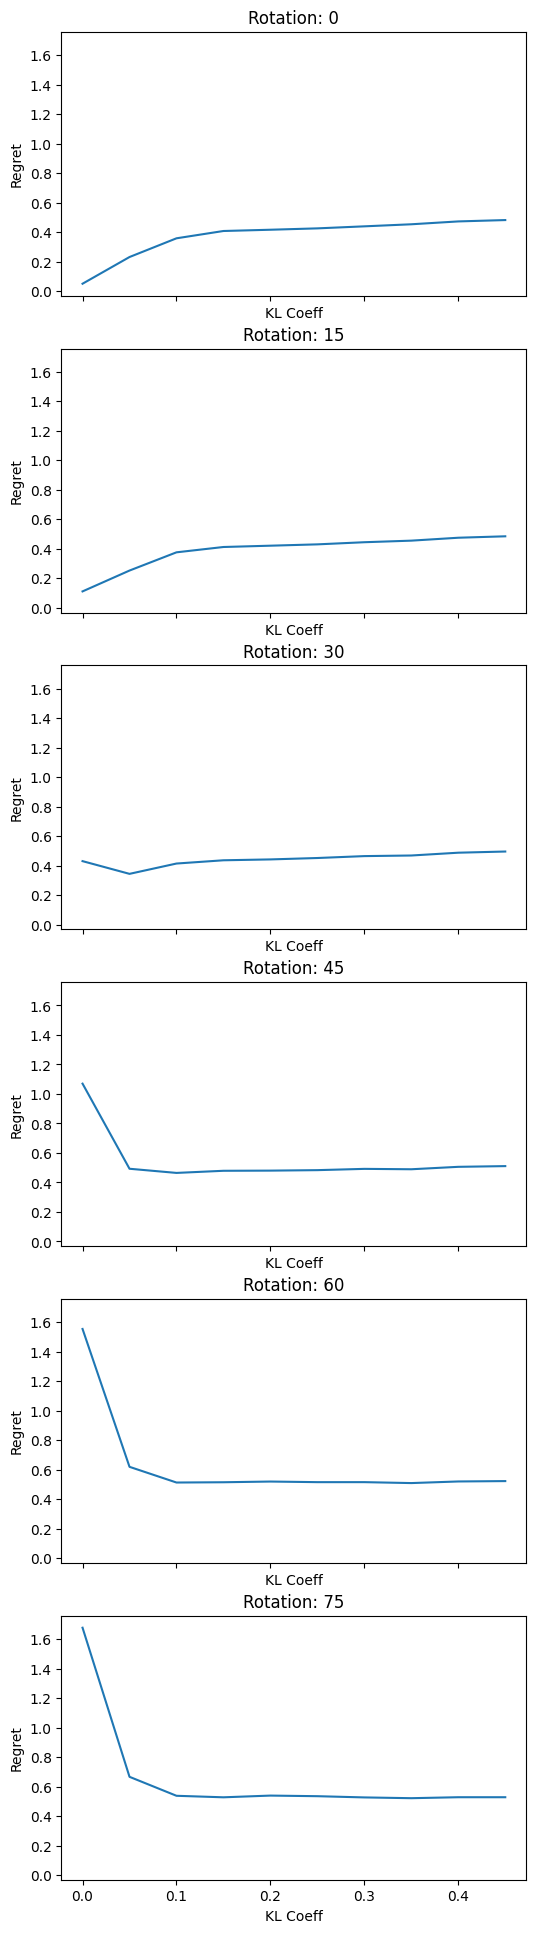

In [3]:
f, axs = plt.subplots(len(rotations), 1, sharey=True, sharex=True, figsize=(6,4*len(rotations)))

policy_avg_return_plot = np.array(robust_policy_avg_return_all)
kl_coeffs = np.array(kl_coeffs)
for i in range(len(rotations)):
    rotation = rotations[i]
    axs[i].plot(kl_coeffs, 0.8 - policy_avg_return_plot[:, i])
#     axs[i].plot(noise_probs, (0.8-baseline_policy_avg_return_per_noise_prob[i])*np.ones(noise_probs.shape), label = "Normal")
    axs[i].set_xlabel("KL Coeff")
    axs[i].set_ylabel("Regret")
    axs[i].set_title("Rotation: "+str(rotation))
# axs[i].legend()

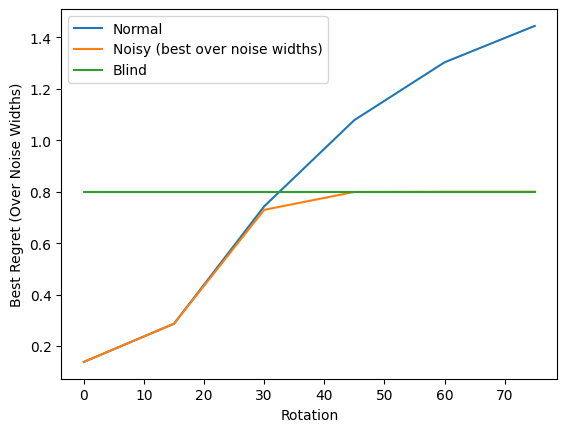

In [6]:
# baseline_policy_avg_return_per_kl_coeff=np.array(baseline_policy_avg_return_per_kl_coeff)
plt.plot(rotations, 0.8-policy_avg_return_plot[0, :], label = "Normal")
plt.plot(rotations, 0.8-np.max(policy_avg_return_plot, axis=0), label = "Noisy (best over noise widths)")
plt.plot(rotations, 0.8*np.ones(rotations.shape), label = "Blind")

# plt.ylim(0, 0.8)
plt.xlabel("Rotation")
plt.ylabel("Best Regret (Over Noise Widths)")
plt.legend()